In [1]:
from triqs_dft_tools.sumk_dft_tools import *
from triqs.gf import *
from h5 import HDFArchive
from triqs.operators.util import *
from triqs_cthyb import *
import triqs.utility.mpi as mpi

Starting serial run at: 2024-09-19 18:34:06.442893


In [2]:
dft_filename = "nsp"  # filename
U = 4.0  # interaction parameters
J = 0.65
beta = 40  # inverse temperature
loops = 15  # number of DMFT loops
mix = 0.8  # mixing factor of Sigma after solution of the AIM
dc_type = 1  # DC type: 0 FLL, 1 Held, 2 AMF
use_blocks = True  # use bloc structure from DFT input
prec_mu = 0.0001  # precision of chemical potential

SK = SumkDFTTools(hdf_file=dft_filename + ".h5", use_dft_blocks=use_blocks)

/home/yamamoto/apps/triqs/triqs.build/lib/python3.10/site-packages/triqs_dft_tools/sumk_dft.py:884: UserWarning: WARNING: No density matrix given. Calculating density matrix with default parameters. This will be deprecated in future releases.
  warn("WARNING: No density matrix given. Calculating density matrix with default parameters. This will be deprecated in future releases.")
/home/yamamoto/apps/triqs/triqs.build/lib/python3.10/site-packages/triqs_dft_tools/sumk_dft.py:1565: UserWarning: WARNING: density_matrix: method 'using_gf' is deprecated. Use 'extract_G_loc' instead.
  warn("WARNING: density_matrix: method 'using_gf' is deprecated. Use 'extract_G_loc' instead.")


In [3]:
# case.h5 ファイルを読み取りモード ('r') で開く
with HDFArchive(dft_filename + ".h5", "r") as ar:
    # HDF5ファイルの中に含まれるキーをリスト表示する
    keys = ar.keys()
    print("Keys in the HDF5 file:", keys)

    # 特定のキーの内容を表示する (例: 'dmft_output')
    if "dmft_output" in keys:
        dmft_data = ar["dmft_output"]
        print("Content of 'dmft_output':", dmft_data)

Keys in the HDF5 file: ['dft_input', 'dft_misc_input']


In [4]:
SK.deg_shells

[[['up_0', 'down_0']]]

In [5]:
w_mesh = MeshReFreq(window=(-10, 4), n_w=1000)
DOS, DOSprojDict, DOSproj_orbDict = SK.density_of_states(
    with_dc=False,
    with_Sigma=False,
    mesh=w_mesh,
    broadening=0.1,
    proj_type="wann",
    save_to_file=False,
)

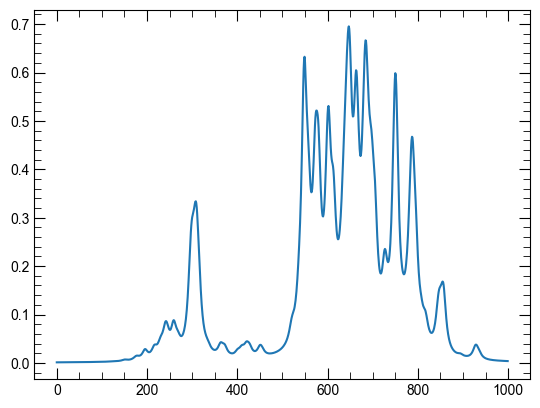

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
# ax.plot(np.array(dos[0]['up']))
for i in range(len(DOSprojDict)):
    ax.plot(np.array(DOSprojDict[i]["up"]))

/home/yamamoto/venvs/triqsenv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/yamamoto/venvs/triqsenv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


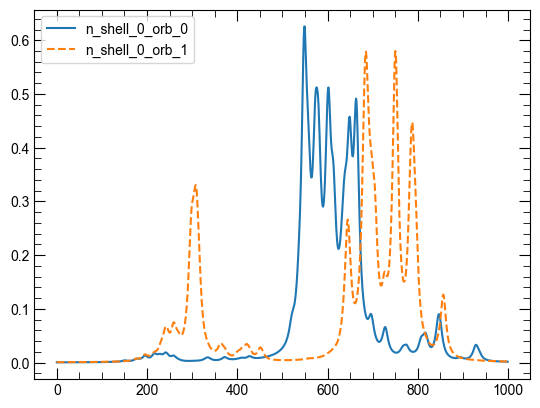

In [7]:
linestyles = ["-", "--", "-.", ":"]
fig, ax = plt.subplots()
# ax.plot(np.array(dos[0]['up']))
for i in range(len(DOSproj_orbDict)):
    for j in range(DOSproj_orbDict[i]["up"].shape[1]):
        ax.plot(
            np.array(DOSproj_orbDict[i]["up"])[:, j, j],
            label=f"n_shell_{i}_orb_{j}",
            linestyle=linestyles[j],
        )
ax.legend()

IndexError: index 2 is out of bounds for axis 1 with size 2

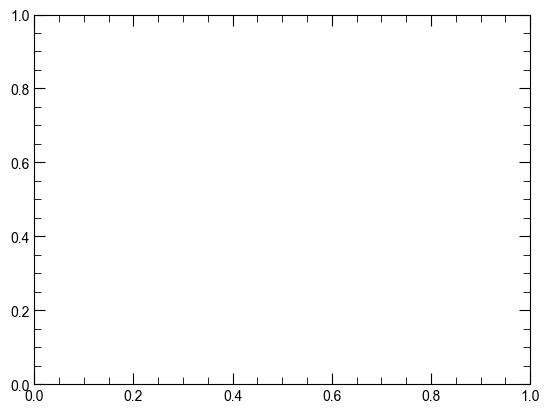

In [8]:
fig, ax = plt.subplots()
# ax.plot(np.array(dos[0]['up']))
ax.plot(np.array(DOSproj_orbDict[0]["up"])[:, 2, 2], label=f"n_shell_{0}_orb_{0}")
ax.legend()

In [48]:
SK.rot_mat

[array([[1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j]]),
 array([[1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j]])]